In [ ]:
import pandas as pd
df1 = pd.read_csv("/content/drive/MyDrive/21-05-2022-NJ-0001-Deep-Learning-Model-Univariate-Data/univariate_final_dataset.csv")

In [ ]:
df1

,Time,Speed,Label
0,0.020005,0.000030,0
1,0.040010,0.120060,0
2,0.060015,0.240090,0
3,0.080020,0.360120,0
4,0.100025,0.480150,0
...,...,...,...
287923,79.919980,9.919278,0
287924,79.939985,9.920927,0
287925,79.959990,9.922542,0
287926,79.979995,9.924124,0


# ***Preparing the data***

In [ ]:
import numpy as np

y = df1['Label']
df1 = df1.drop("Label", axis=1)
#normalized_df=(df1-df1.mean())/df1.std()
X = np.asarray(df1)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# ***Making the models***

In [ ]:
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from sklearn.cluster import SpectralClustering
import time
from keras import callbacks
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Input, Dropout
from keras.initializers import VarianceScaling
#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
import tensorflow as tf
from keras.layers import SimpleRNN, GRU,LSTM,Dense, Dropout, BatchNormalization,Bidirectional

# ***Simple RNN***


In [ ]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_rnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model



In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
from sklearn import metrics
# importing the module
import tracemalloc


lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model2 = get_rnn(2,opt)
model2.summary()
# starting the monitoring
tracemalloc.start()
start = time.process_time()
history2 = model2.fit(X_train,y1,epochs = 50, batch_size=1024,validation_data=(X_val,y_val1))
print(time.process_time() - start)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 2, 64)             4224      
                                                                 
 batch_normalization_10 (Bat  (None, 2, 64)            256       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 2, 5)              325       
                                                                 
 batch_normalization_11 (Bat  (None, 2, 5)             20        
 chNormalization)                                                
                                                                 
 dense_14 (Dense)            (None, 2, 3)              18        
                                                                 
 batch_normalization_12 (Bat  (None, 2, 3)            

3.2015554090000364


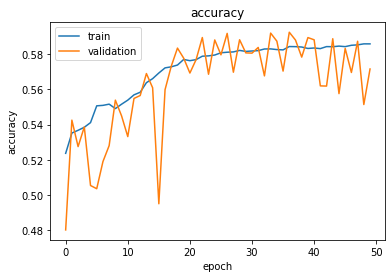

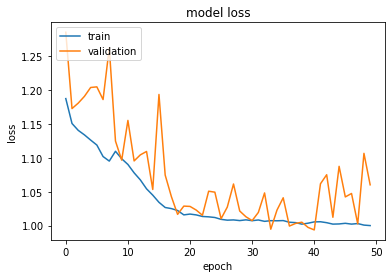

the model is rnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f9ffc53fa50>
the confusion matrix is [[21009  4250   322     0]
 [ 2396  5539   477     0]
 [ 3442  2535   527     0]
 [ 2492  4154   366     0]]


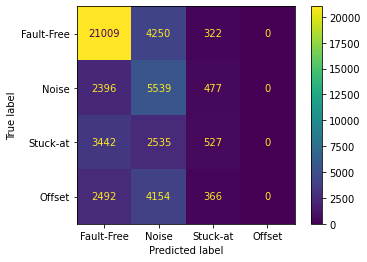

the accuracy for test is is 0.5698920204592814
              precision    recall  f1-score   support

  Fault-Free       0.72      0.82      0.77     25581
       Noise       0.34      0.66      0.45      8412
    Stuck-at       0.31      0.08      0.13      6504
      Offset       0.00      0.00      0.00      7012

    accuracy                           0.57     47509
   macro avg       0.34      0.39      0.33     47509
weighted avg       0.49      0.57      0.51     47509

(59873417, 61158858)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
start = time.process_time()
yp =model2.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history2.history['acc'])
plt.title('model accuracy')
plt.plot(history2.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.plot(history2.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is rnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Autoencoder based classifier***

In [ ]:
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from sklearn.cluster import SpectralClustering
import time
from keras import callbacks
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Input, Dropout
from keras.initializers import VarianceScaling
#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
import tensorflow as tf

In [ ]:
# Building the Input Layer
input_layer = Input(shape =(2, ))
  
# Building the Encoder network
encoded = Dense(4, activation ='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(8, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)

  
# Building the Decoder network

decoded = Dense(4, activation ='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(8, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
  
# Building the Output Layer
output_layer = Dense(4, activation ='softmax')(decoded)

In [ ]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adam", loss ="categorical_crossentropy",metrics='acc')
  
# Training the Auto-encoder network


In [ ]:

lr=0.001
opt=tf.keras.optimizers.Adam(lr)
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
# starting the monitoring
tracemalloc.start()
start = time.process_time()
history3 = autoencoder.fit(X_train,y1,epochs=50, batch_size=512,validation_data=(X_val,y_val1))
print(time.process_time() - start)


Epoch 1/50
377/377 [==============================] - 4s 6ms/step - loss: 1.2336 - acc: 0.5025 - val_loss: 1.2504 - val_acc: 0.5335
Epoch 2/50
377/377 [==============================] - 2s 5ms/step - loss: 1.1314 - acc: 0.5453 - val_loss: 1.0946 - val_acc: 0.5555
Epoch 3/50
377/377 [==============================] - 2s 5ms/step - loss: 1.0873 - acc: 0.5530 - val_loss: 1.0745 - val_acc: 0.5649
Epoch 4/50
377/377 [==============================] - 2s 5ms/step - loss: 1.0399 - acc: 0.5657 - val_loss: 1.0136 - val_acc: 0.5699
Epoch 5/50
377/377 [==============================] - 2s 5ms/step - loss: 1.0144 - acc: 0.5701 - val_loss: 0.9787 - val_acc: 0.5878
Epoch 6/50
377/377 [==============================] - 2s 5ms/step - loss: 1.0051 - acc: 0.5705 - val_loss: 0.9716 - val_acc: 0.5885
Epoch 7/50
377/377 [==============================] - 2s 5ms/step - loss: 1.0011 - acc: 0.5697 - val_loss: 0.9581 - val_acc: 0.5894
Epoch 8/50
377/377 [==============================] - 2s 5ms/step - loss: 0.

2.590074773999959


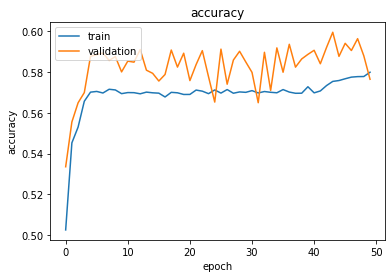

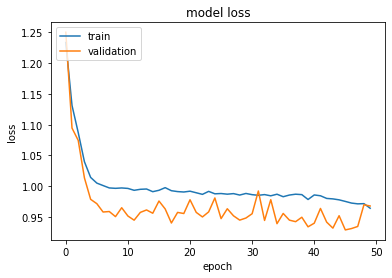

the model is autoencoders
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f9ff92318d0>
the confusion matrix is [[23820   100  1661     0]
 [ 5613   744  2055     0]
 [ 3600   304  2600     0]
 [ 4664   669  1679     0]]


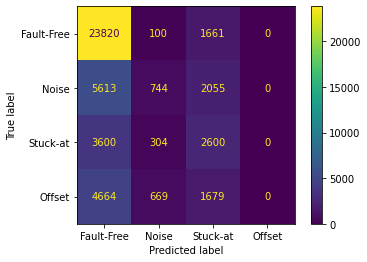

the accuracy for test is is 0.5717653497232104
              precision    recall  f1-score   support

  Fault-Free       0.63      0.93      0.75     25581
       Noise       0.41      0.09      0.15      8412
    Stuck-at       0.33      0.40      0.36      6504
      Offset       0.00      0.00      0.00      7012

    accuracy                           0.57     47509
   macro avg       0.34      0.35      0.31     47509
weighted avg       0.46      0.57      0.48     47509

(11257324, 12548200)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
start = time.process_time()
yp =autoencoder.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history3.history['acc'])
plt.title('model accuracy')
plt.plot(history3.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.plot(history3.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is autoencoders")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Transformers based classifier***

In [ ]:
from keras import layers
import keras
import tensorflow as tf
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads,
                                             key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)  # self-attention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # layer norm
        ffn_output = self.ffn(out1)  #feed-forward layer
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # layer norm

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
def transatt(input_length, opt):
  embed_dim = 40 # Embedding size for each token
  num_heads = 2  # Number of attention heads
  ff_dim = 3  # Hidden layer size in feed forward network inside transformer

  model = keras.Sequential()
  model.add(layers.Input(shape=(input_length, )))
  model.add(TokenAndPositionEmbedding(input_length, 1000000, embed_dim))
  model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(ff_dim, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [ ]:
lr=0.001
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
opt=tf.keras.optimizers.Adam(lr)
model3 = transatt(2,opt)
# starting the monitoring
start = time.process_time()
history = model3.fit(X_train,y1,epochs = 50, batch_size=4096,validation_data=(X_val,y_val1))
print(time.process_time() - start)

Epoch 1/50
48/48 [==============================] - 28s 512ms/step - loss: 1.1299 - acc: 0.5206 - val_loss: 1.0051 - val_acc: 0.5440
Epoch 2/50
48/48 [==============================] - 25s 531ms/step - loss: 1.0389 - acc: 0.5382 - val_loss: 0.9672 - val_acc: 0.5930
Epoch 3/50
48/48 [==============================] - 23s 472ms/step - loss: 0.9899 - acc: 0.5815 - val_loss: 0.8912 - val_acc: 0.6698
Epoch 4/50
48/48 [==============================] - 23s 481ms/step - loss: 0.9151 - acc: 0.6255 - val_loss: 0.8263 - val_acc: 0.6870
Epoch 5/50
48/48 [==============================] - 23s 472ms/step - loss: 0.8822 - acc: 0.6319 - val_loss: 0.7988 - val_acc: 0.6932
Epoch 6/50
48/48 [==============================] - 23s 473ms/step - loss: 0.8660 - acc: 0.6341 - val_loss: 0.7805 - val_acc: 0.6988
Epoch 7/50
48/48 [==============================] - 24s 496ms/step - loss: 0.8484 - acc: 0.6380 - val_loss: 0.7641 - val_acc: 0.7016
Epoch 8/50
48/48 [==============================] - 23s 471ms/step - 

3.4608727020004153


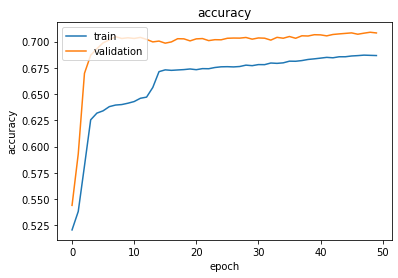

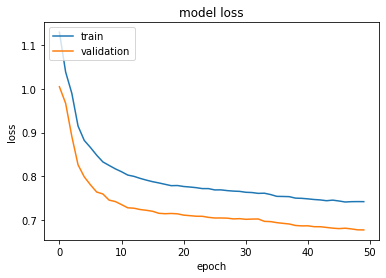

the model is transformers
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f9feec69d50>
the confusion matrix is [[24548   450   583     0]
 [ 1717  5183  1512     0]
 [ 2685   125  3694     0]
 [ 2183  3701  1106    22]]


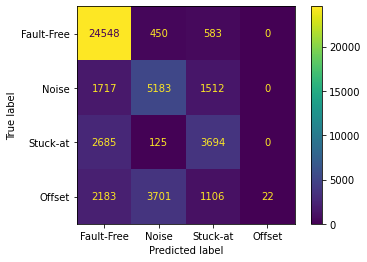

the accuracy for test is is 0.7040139762992275
              precision    recall  f1-score   support

  Fault-Free       0.79      0.96      0.87     25581
       Noise       0.55      0.62      0.58      8412
    Stuck-at       0.54      0.57      0.55      6504
      Offset       1.00      0.00      0.01      7012

    accuracy                           0.70     47509
   macro avg       0.72      0.54      0.50     47509
weighted avg       0.74      0.70      0.65     47509

(0, 0)


In [ ]:
start = time.process_time()
yp =model3.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is transformers")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***GRU+Simple RNN***

In [ ]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_grurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(GRU(units=64, return_sequences=True, activation='relu'))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model


In [ ]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model4 = get_grurnn(2,opt)
start = time.process_time()
history4 = model4.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))
print(time.process_time() - start)


Epoch 1/50
95/95 [==============================] - 12s 59ms/step - loss: 1.4126 - acc: 0.3861 - val_loss: 1.3958 - val_acc: 0.1691
Epoch 2/50
95/95 [==============================] - 5s 52ms/step - loss: 1.1618 - acc: 0.5401 - val_loss: 1.4215 - val_acc: 0.1393
Epoch 3/50
95/95 [==============================] - 5s 56ms/step - loss: 1.0746 - acc: 0.5544 - val_loss: 1.4783 - val_acc: 0.3198
Epoch 4/50
95/95 [==============================] - 4s 45ms/step - loss: 1.0255 - acc: 0.5850 - val_loss: 1.3231 - val_acc: 0.4895
Epoch 5/50
95/95 [==============================] - 5s 48ms/step - loss: 1.0065 - acc: 0.5949 - val_loss: 1.2340 - val_acc: 0.4397
Epoch 6/50
95/95 [==============================] - 4s 45ms/step - loss: 0.9831 - acc: 0.6048 - val_loss: 1.0945 - val_acc: 0.5421
Epoch 7/50
95/95 [==============================] - 5s 48ms/step - loss: 0.9777 - acc: 0.6017 - val_loss: 1.1182 - val_acc: 0.5160
Epoch 8/50
95/95 [==============================] - 4s 45ms/step - loss: 0.9669 - 

4.278531187999988


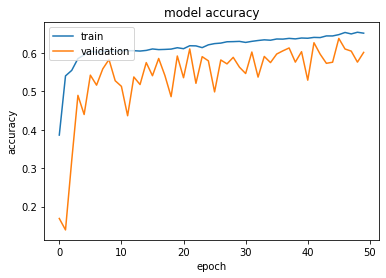

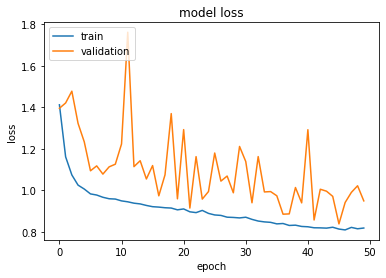

the model is gru+simplernn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f9ff674d190>
the confusion matrix is [[20433  3459  1650    39]
 [ 2861  4642   841    68]
 [ 2642   364  3460    38]
 [ 2686  3687   561    78]]


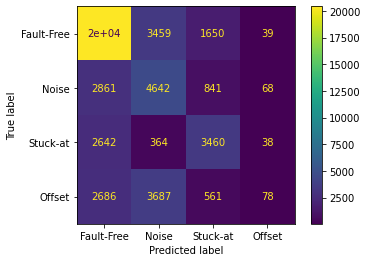

the accuracy is 0.6022648340314467
              precision    recall  f1-score   support

  Fault-Free       0.71      0.80      0.75     25581
       Noise       0.38      0.55      0.45      8412
    Stuck-at       0.53      0.53      0.53      6504
      Offset       0.35      0.01      0.02      7012

    accuracy                           0.60     47509
   macro avg       0.49      0.47      0.44     47509
weighted avg       0.58      0.60      0.56     47509

(15703882, 16971971)


In [ ]:
start = time.process_time()
yp =model4.predict(X_test)
print(time.process_time() - start)

ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history4.history['acc'])
plt.title('model accuracy')
plt.plot(history4.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history4.history['loss'])
plt.title('model loss')
plt.plot(history4.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is gru+simplernn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Bidirectional GRU +Bidirectional SimpleRNN***

In [ ]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_bigrurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(Bidirectional(GRU(units=64, return_sequences=True, activation='relu')))
  model.add(Bidirectional(SimpleRNN(units=64, return_sequences=True, activation='relu')))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [ ]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model5 = get_bigrurnn(2,opt)
start = time.process_time()
history5 = model5.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))
print(time.process_time() - start)

Epoch 1/50
95/95 [==============================] - 15s 96ms/step - loss: 1.3520 - acc: 0.2920 - val_loss: 1.3843 - val_acc: 0.1401
Epoch 2/50
95/95 [==============================] - 8s 88ms/step - loss: 1.1611 - acc: 0.5465 - val_loss: 1.3255 - val_acc: 0.3707
Epoch 3/50
95/95 [==============================] - 9s 91ms/step - loss: 1.1029 - acc: 0.5577 - val_loss: 1.2524 - val_acc: 0.4905
Epoch 4/50
95/95 [==============================] - 8s 87ms/step - loss: 1.0701 - acc: 0.5611 - val_loss: 1.2215 - val_acc: 0.4913
Epoch 5/50
95/95 [==============================] - 8s 87ms/step - loss: 1.0149 - acc: 0.5805 - val_loss: 1.1049 - val_acc: 0.5501
Epoch 6/50
95/95 [==============================] - 8s 86ms/step - loss: 0.9775 - acc: 0.5934 - val_loss: 1.0537 - val_acc: 0.5702
Epoch 7/50
95/95 [==============================] - 8s 86ms/step - loss: 0.9484 - acc: 0.6061 - val_loss: 1.0172 - val_acc: 0.5699
Epoch 8/50
95/95 [==============================] - 8s 86ms/step - loss: 0.9265 - 

6.165946181999971


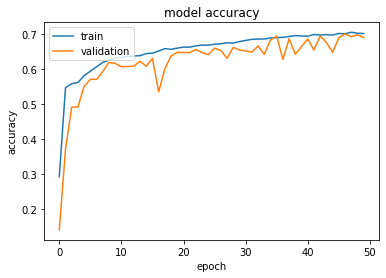

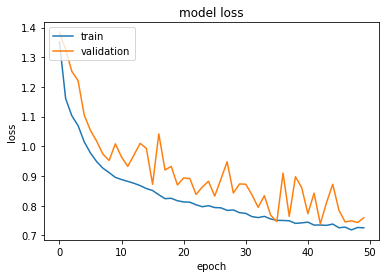

the model is bigru+birnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f9fff130450>
the confusion matrix is [[24332   325   832    92]
 [ 2708  4716   666   322]
 [ 2958   113  3388    45]
 [ 2923  3339   448   302]]


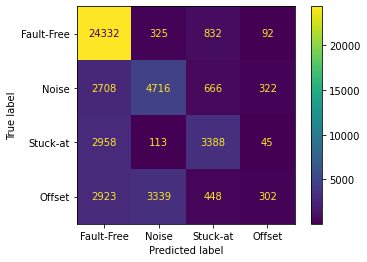

the accuracy is 0.6890904881180407
              precision    recall  f1-score   support

  Fault-Free       0.74      0.95      0.83     25581
       Noise       0.56      0.56      0.56      8412
    Stuck-at       0.64      0.52      0.57      6504
      Offset       0.40      0.04      0.08      7012

    accuracy                           0.69     47509
   macro avg       0.58      0.52      0.51     47509
weighted avg       0.64      0.69      0.64     47509

(20428823, 21689112)


In [ ]:
start = time.process_time()
yp =model5.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history5.history['acc'])
plt.title('model accuracy')
plt.plot(history5.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"5
plt.plot(history5.history['loss'])
plt.title('model loss')
plt.plot(history5.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is bigru+birnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM, Dropout,Dense,RepeatVector,TimeDistributed,Input,BatchNormalization,RepeatVector
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adam as adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import load_model

In [ ]:
from keras.layers import GlobalAveragePooling1D
model6 = Sequential()
model6.add(LSTM(128, input_shape=(2,1)))
model6.add(Dropout(rate=0.2))
model6.add(RepeatVector(1))
model6.add(LSTM(128, return_sequences=True))
model6.add(Dropout(rate=0.2))
model6.add(TimeDistributed(Dense(4)))
model6.add(GlobalAveragePooling1D())
model6.add(Dense(4,activation='softmax'))

model6.compile(optimizer='adam', loss='categorical_crossentropy',metrics='acc')
model6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 128)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_9 (Dropout)         (None, 1, 128)            0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 4)             516       
 ibuted)                                             

In [ ]:
start = time.process_time()
history6= model6.fit(X_train, y1,epochs=50,batch_size=2048,validation_data=(X_val,y_val1))
print(time.process_time() - start)

Epoch 1/50
95/95 [==============================] - 17s 136ms/step - loss: 1.2138 - acc: 0.5321 - val_loss: 1.1842 - val_acc: 0.5440
Epoch 2/50
95/95 [==============================] - 12s 126ms/step - loss: 1.1824 - acc: 0.5377 - val_loss: 1.1610 - val_acc: 0.5438
Epoch 3/50
95/95 [==============================] - 12s 128ms/step - loss: 1.1630 - acc: 0.5385 - val_loss: 1.1443 - val_acc: 0.5440
Epoch 4/50
95/95 [==============================] - 13s 132ms/step - loss: 1.1431 - acc: 0.5383 - val_loss: 1.1161 - val_acc: 0.5440
Epoch 5/50
95/95 [==============================] - 12s 127ms/step - loss: 1.1169 - acc: 0.5384 - val_loss: 1.0854 - val_acc: 0.5478
Epoch 6/50
95/95 [==============================] - 12s 125ms/step - loss: 1.0962 - acc: 0.5398 - val_loss: 1.0633 - val_acc: 0.5528
Epoch 7/50
95/95 [==============================] - 12s 123ms/step - loss: 1.0760 - acc: 0.5416 - val_loss: 1.0382 - val_acc: 0.5560
Epoch 8/50
95/95 [==============================] - 12s 123ms/step - 

5.4401362349999545


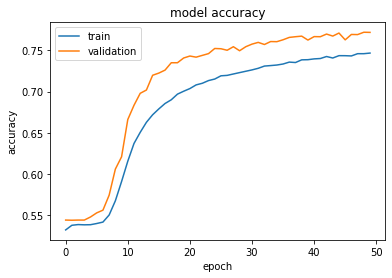

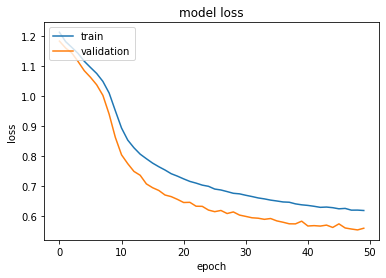

the model is lstm ae
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f9fff130450>
the confusion matrix is [[24012   449   700   420]
 [ 1021  6235   389   767]
 [ 2296   248  3897    63]
 [ 1637  2716   267  2392]]


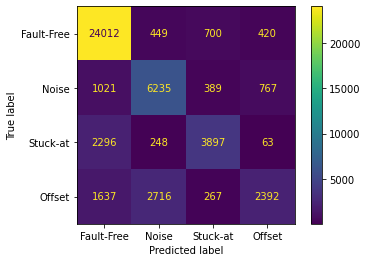

the accuracy is 0.7690332358079521
              precision    recall  f1-score   support

  Fault-Free       0.83      0.94      0.88     25581
       Noise       0.65      0.74      0.69      8412
    Stuck-at       0.74      0.60      0.66      6504
      Offset       0.66      0.34      0.45      7012

    accuracy                           0.77     47509
   macro avg       0.72      0.66      0.67     47509
weighted avg       0.76      0.77      0.75     47509

(0, 0)


In [ ]:
start = time.process_time()
yp =model6.predict(X_test)
print(time.process_time() - start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history6.history['acc'])
plt.title('model accuracy')
plt.plot(history6.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history6.history['loss'])
plt.title('model loss')
plt.plot(history6.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is lstm ae")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

In [ ]:
models = list()
n_members = 6
models = [model2,model3,model4,model5,autoencoder,model6]



In [ ]:

from sklearn.linear_model import LogisticRegression
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat
		else:
			stackX = np.dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

In [ ]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression()
	model.fit(stackedX, inputy)
	return model

In [ ]:

# fit stacked model using the ensemble
start = time.process_time()
model = fit_stacked_model(models, X_test, y_test)
print(time.process_time() - start)

28.472809552999934


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [ ]:
start = time.process_time()
yhat = stacked_prediction(models, model, X_test)
print(time.process_time() - start)
acc = accuracy_score(y_test, yhat)
print('Stacked Test Accuracy: %.3f' % acc)

21.192493258000468
Stacked Test Accuracy: 0.787


the model is ensemble
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x7f9feec69d50>
the confusion matrix is [[24164   362   636   419]
 [  666  6406   449   891]
 [ 1948   257  4214    85]
 [ 1218  2893   283  2618]]


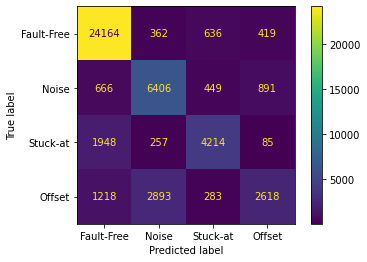

the accuracy is 0.7872613610052832
              precision    recall  f1-score   support

  Fault-Free       0.86      0.94      0.90     25581
       Noise       0.65      0.76      0.70      8412
    Stuck-at       0.75      0.65      0.70      6504
      Offset       0.65      0.37      0.47      7012

    accuracy                           0.79     47509
   macro avg       0.73      0.68      0.69     47509
weighted avg       0.78      0.79      0.78     47509

(0, 0)


In [ ]:
actual=y_test
predicted=yhat

  
  
print("the model is ensemble")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,yhat))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()